In [1]:
## Set which network and what epoch to look at
# model_n = 0
# net = 'stepnet'
# epoch = 'go1'
# dir_specific_all = 'lowD/combos'#''varGo/lowD/'#'combos'#'grad_norm_l2001'#'grad_norm_l2h000001'
# rule_set = ['delaygo','delayanti']

model_n = 1
net = 'stepnet'
epoch = 'go1' # epoch = 2 #go1 epoch
dir_specific_all = 'tanh/'#'varGo/lowD/'#'lowD/combos' #'lowD/combos' #lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
rule_set = ['delaygo','delayanti']

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.spatial import distance

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'
    print(p)
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)
sys.path.insert(0, PATH_YANGNET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
import tools
from scipy import stats
from sklearn import linear_model

from tools_lnd import gen_trials_from_model_dir, gen_X_from_model_dir, gen_X_from_model_dir_epoch, name_best_ckpt, find_ckpts, get_model_params, get_path_names

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/Users/lauradriscoll/Documents


In [3]:
print(ui)

lauradriscoll


In [4]:
trial = {}
fpf_dict = {}
p = get_path_names()

rule = rule_set[0]

for rule in rule_set:
    filename = rule+'_'+epoch+'.npy'
    model_dir = os.path.join(p,'data/rnn/multitask/',dir_specific_all,'most',str(model_n))
    save_dir = os.path.join(model_dir,'fixed_pts',rule)

    fpf_dict[rule] = np.load(os.path.join(save_dir,filename)).item()
    trial[rule] = gen_trials_from_model_dir(model_dir,rule)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/mos

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_

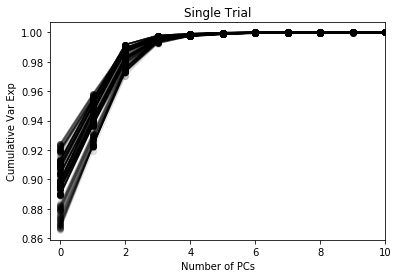

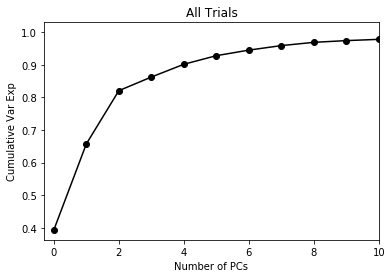

In [5]:
model = Model(model_dir)
ckpt_n = name_best_ckpt(model_dir,'delaygo')
ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
trial_delaygo = gen_trials_from_model_dir(model_dir,'delaygo')
X_delaygo, x_delaygo = gen_X_from_model_dir_epoch(model_dir,ckpt_n_dir,trial_delaygo,epoch)

for t in range(400):
    pca = PCA()
    pca.fit(x_delaygo[:,t,:])#(X_delaygo)
    ev_train = pca.explained_variance_
    plt.plot(np.cumsum(ev_train)/sum(ev_train),'-ok',alpha = .1)
plt.xlim((-.3,10))
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Var Exp')
plt.title('Single Trial')
plt.show()


pca = PCA()
pca.fit(X_delaygo)
ev_train = pca.explained_variance_
plt.plot(np.cumsum(ev_train)/sum(ev_train),'-ok')
plt.xlim((-.3,10))
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Var Exp')
plt.title('All Trials')
plt.show()

In [6]:
def fp_distances(fpf_task1,x_task1,fpf_task2):
    n_fps = np.shape(fpf_task1)[0]
    dist_xx = np.zeros((n_fps))
    dist_xx_same = np.zeros((n_fps))

    for xi in range(n_fps):
        
        inds = range(n_fps)
        del inds[xi]
        
        delta_x12 = fpf_task1-fpf_task2[xi,:]
        dist_xx[xi] = np.min(np.sqrt(np.sum(delta_x12[inds,:]**2,axis=1)))
        
        delta_x11 = fpf_task1-fpf_task1[xi,:]
        dist_xx_same[xi] = np.min(np.sqrt(np.sum(delta_x11[inds,:]**2,axis=1)))

    n_stim = np.shape(x_delaygo)[1]
    dist_ringD = np.zeros((int(n_stim/2)))
    dist_ringD_late = np.zeros((int(n_stim/2)))
    dist_ring_eps = np.zeros((int(n_stim/2)))

    for xi in range(int(n_stim/2)):
        
        delta_ringD_late = x_task1[:,xi,-1]-x_task1[:,xi+200,-1]
        delta_ringD = x_task1[:,xi,0]-x_task1[:,xi+200,0]
        delta_ring_eps = x_task1[:,xi,0]-x_task1[:,xi+2,0]
        
        dist_ringD[xi] = np.sqrt(np.sum(delta_ringD**2))
        dist_ring_eps[xi] = np.sqrt(np.sum(delta_ring_eps**2))
        dist_ringD_late[xi] = np.sqrt(np.sum(delta_ringD_late**2))
        
    return dist_xx, dist_xx_same, dist_ring_eps, dist_ringD, dist_ringD_late

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_

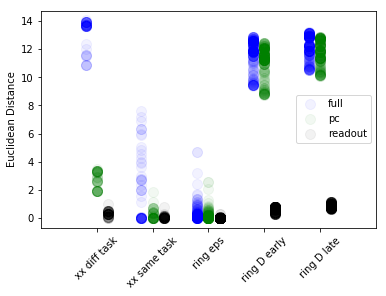

In [7]:
#Stim rep distances
w_in, b_in, w_out, b_out = get_model_params(model_dir)
model = Model(model_dir)
ckpt_n = name_best_ckpt(model_dir,'delaygo')
ckpt_n_dir = os.path.join(model_dir,'ckpts/model.ckpt-' + str(int(ckpt_n)))
trial_delaygo = gen_trials_from_model_dir(model_dir,'delaygo')
X_delaygo, x_delaygo = gen_X_from_model_dir_epoch(model_dir,ckpt_n_dir,trial_delaygo,epoch)

N, Tr, Ti = np.shape(x_delaygo)
n_pcs = 2
pca = PCA(n_components = n_pcs)
X_pca = pca.fit_transform(X_delaygo.T)

fpf_task1 = fpf_dict['delaygo']['xstar']
fpf_task2 = fpf_dict['delayanti']['xstar']
x_task1 = np.transpose(np.reshape(X_delaygo.T,(Tr,Ti,N)),(2,0,1))
full = fp_distances(fpf_task1,x_task1,fpf_task2)

fpf_task1 = pca.transform(fpf_dict['delaygo']['xstar'])
fpf_task2 = pca.transform(fpf_dict['delayanti']['xstar'])
x_task1 = np.transpose(np.reshape(X_pca,(Tr,Ti,n_pcs)),(2,0,1))
pc = fp_distances(fpf_task1,x_task1,fpf_task2)

fpf_task1 = np.dot(fpf_dict['delaygo']['xstar'],w_out[:,1:3])
fpf_task2 = np.dot(fpf_dict['delayanti']['xstar'],w_out[:,1:3])
x_task1 = np.transpose(np.reshape(np.dot(X_delaygo.T,w_out[:,1:3]),(Tr,Ti,2)),(2,0,1))
ro = fp_distances(fpf_task1,x_task1,fpf_task2)


#PC SPACE
def plot_dist_set(d,shift,c,label):
    plt.plot(shift*np.ones(np.shape(d[0])),d[0],'o',color = c,alpha = .05,markersize = 10,label = label)
    for ii in range(1,len(d)):
        plt.plot((ii+shift)*np.ones(np.shape(d[ii])),d[ii],'o',color = c,alpha = .05,markersize = 10)
    
plot_dist_set(full, -.2,'b','full')
plot_dist_set(pc,0,'g','pc')
plot_dist_set(ro,.2,'k','readout')  
plt.xlim((-1,len(ro)))
plt.xticks(range(len(ro)),('xx diff task','xx same task','ring eps','ring D early','ring D late'), rotation = 45)
plt.ylabel('Euclidean Distance')
plt.legend()

plt.show()

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


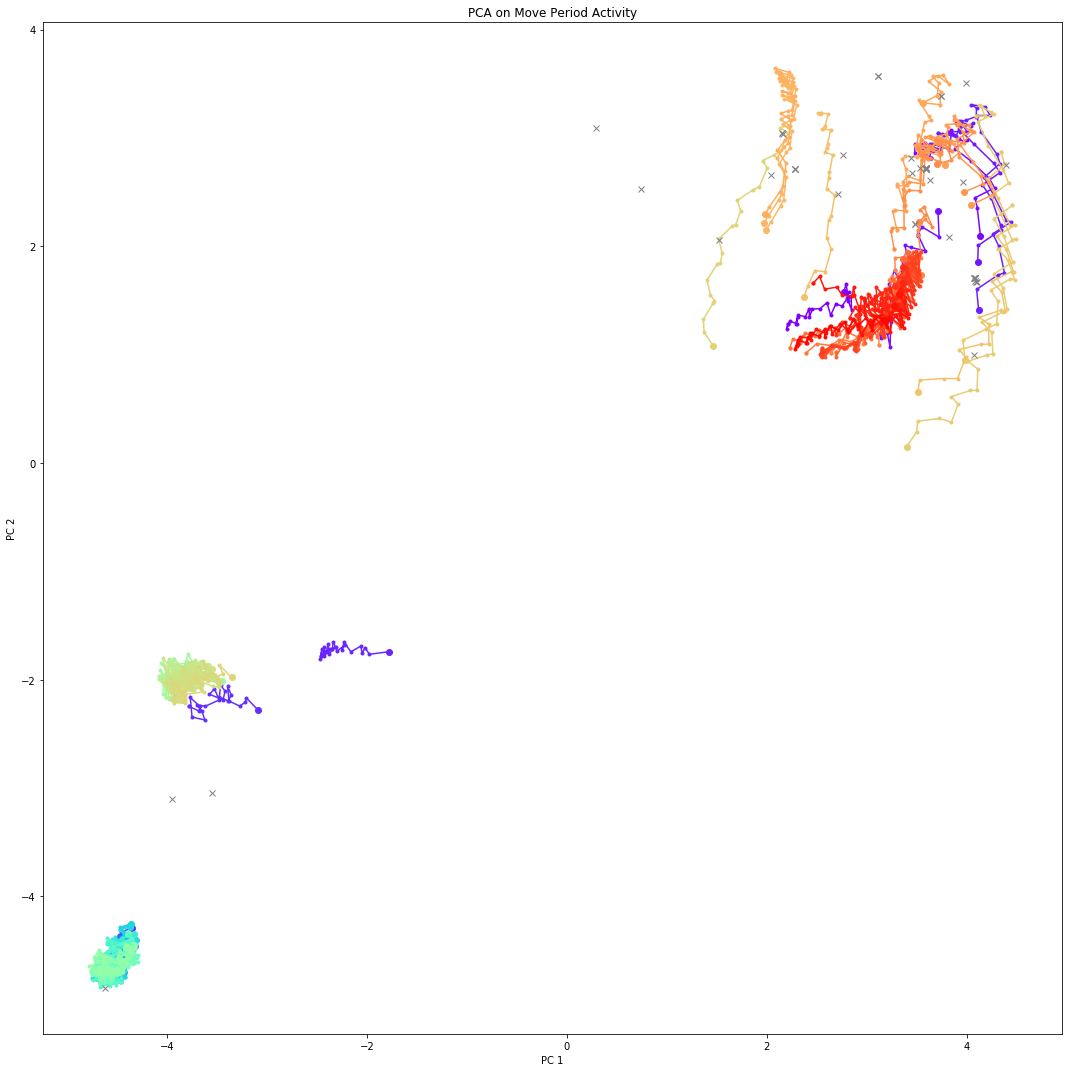

In [8]:
def plot_in_space(D, r = 0, skip_trials = 2, plot_trials = 100):
    fig = plt.figure(figsize=(15, 15),tight_layout=True,facecolor='white')
    cmap=plt.get_cmap('rainbow')
    qmap=plt.get_cmap('gray')

    dim0 = 0
    dim1 = 1
    rule = 'delaygo'
    T,S,_ = np.shape(trial[rule].x)
    shift_ind = int(S/skip_trials)
    e_start = fpf_dict[rule_set[0]]['epoch_inds'][0]
    e_end = fpf_dict[rule_set[0]]['epoch_inds'][-1]
    
#     X = np.concatenate((fpf_dict[rule_set[r]]['state_traj'][0:S:skip_trials,e_start:e_end,:],
#                         fpf_dict[rule_set[1]]['state_traj'][0:S:skip_trials,e_start:e_end,:]),axis = 0)
    X = fpf_dict[rule_set[r]]['state_traj'][0:S:skip_trials,e_start:e_end,:]

    for t in range(0,shift_ind,int(np.ceil(shift_ind/plot_trials))):
        c = cmap(t/shift_ind)
        X_trial = np.dot(X[t,:,:],D.T)
        plt.plot(X_trial[0,dim0],X_trial[0,dim1],'o',c = c)
        plt.plot(X_trial[:,dim0],X_trial[:,dim1],'.-',c = c)
        plt.plot(X_trial[-1,dim0],X_trial[-1,dim1],'.',c = c)

#         X_trial = np.dot(X[shift_ind+t,:,:],D.T)
#         plt.plot(X_trial[0,dim0],X_trial[0,dim1],'o',c = c)
#         plt.plot(X_trial[:,dim0],X_trial[:,dim1],'.:',c = c)
#         plt.plot(X_trial[-1,dim0],X_trial[-1,dim1],'.',c = c)
        
    for xi in range(len(fpf_dict[rule]['xstar'])):
        if fpf_dict[rule]['qstar'][xi]<.002:
            xstar_pca = np.dot(D,np.expand_dims(fpf_dict['delaygo']['xstar'][xi],axis = 1))
            plt.plot(xstar_pca[dim0,:],xstar_pca[dim1,:],'x',c = [.5, .5, .5])

#             xstar_pca = np.dot(D,np.expand_dims(fpf_dict['delayanti']['xstar'][xi],axis = 1))
#             plt.plot(xstar_pca[dim0,:],xstar_pca[dim1,:],'xk')

plot_in_space(pca.components_)
plt.xlabel('PC 1')
plt.ylabel('PC 2')  
plt.title('PCA on Move Period Activity')        
plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/tanh/most/1/model.ckpt


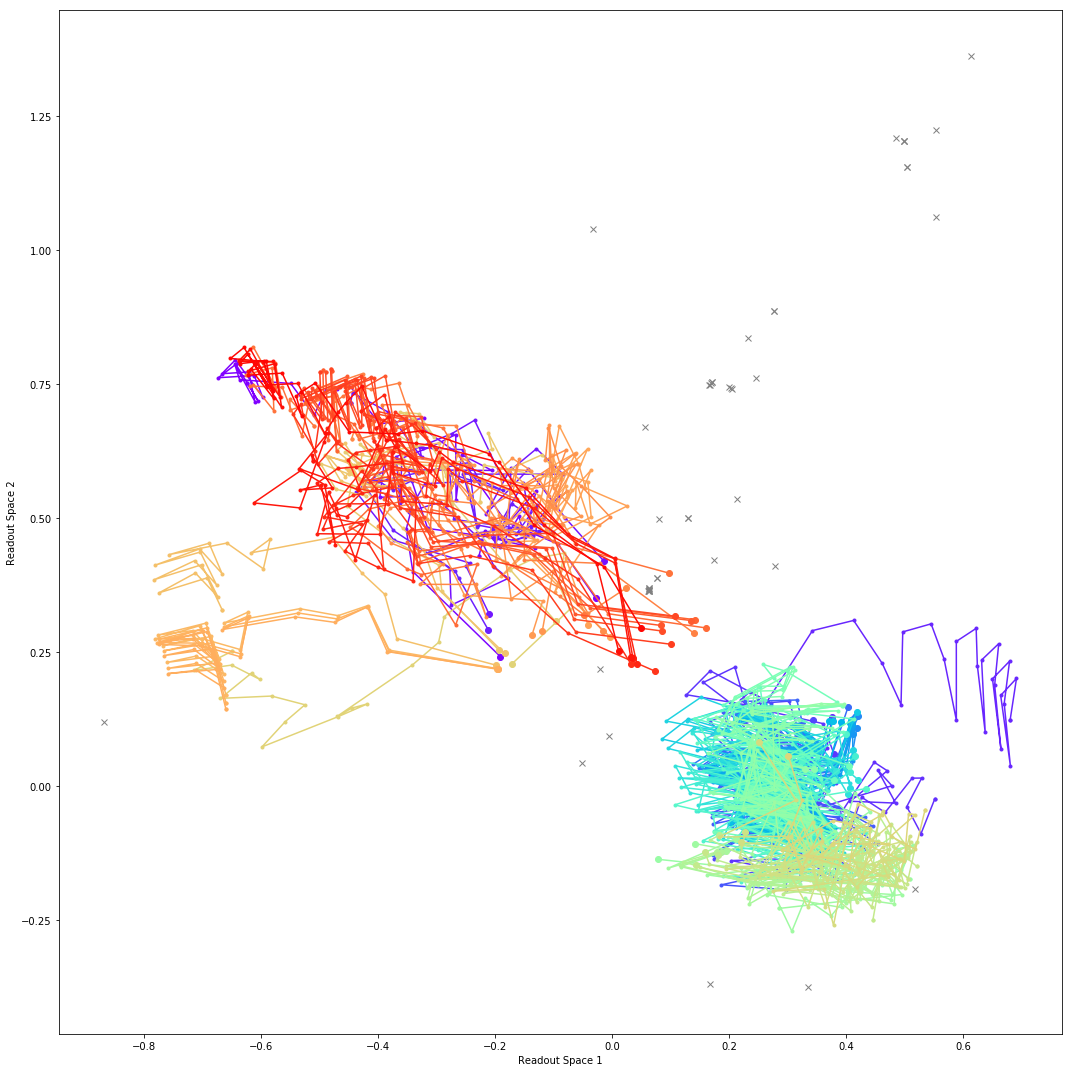

In [9]:
w_in, b_in, w_out, b_out = get_model_params(model_dir)
plot_in_space(w_out[:,1:3].T, plot_trials = 100)
plt.xlabel('Readout Space 1')
plt.ylabel('Readout Space 2')     
plt.show()

/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


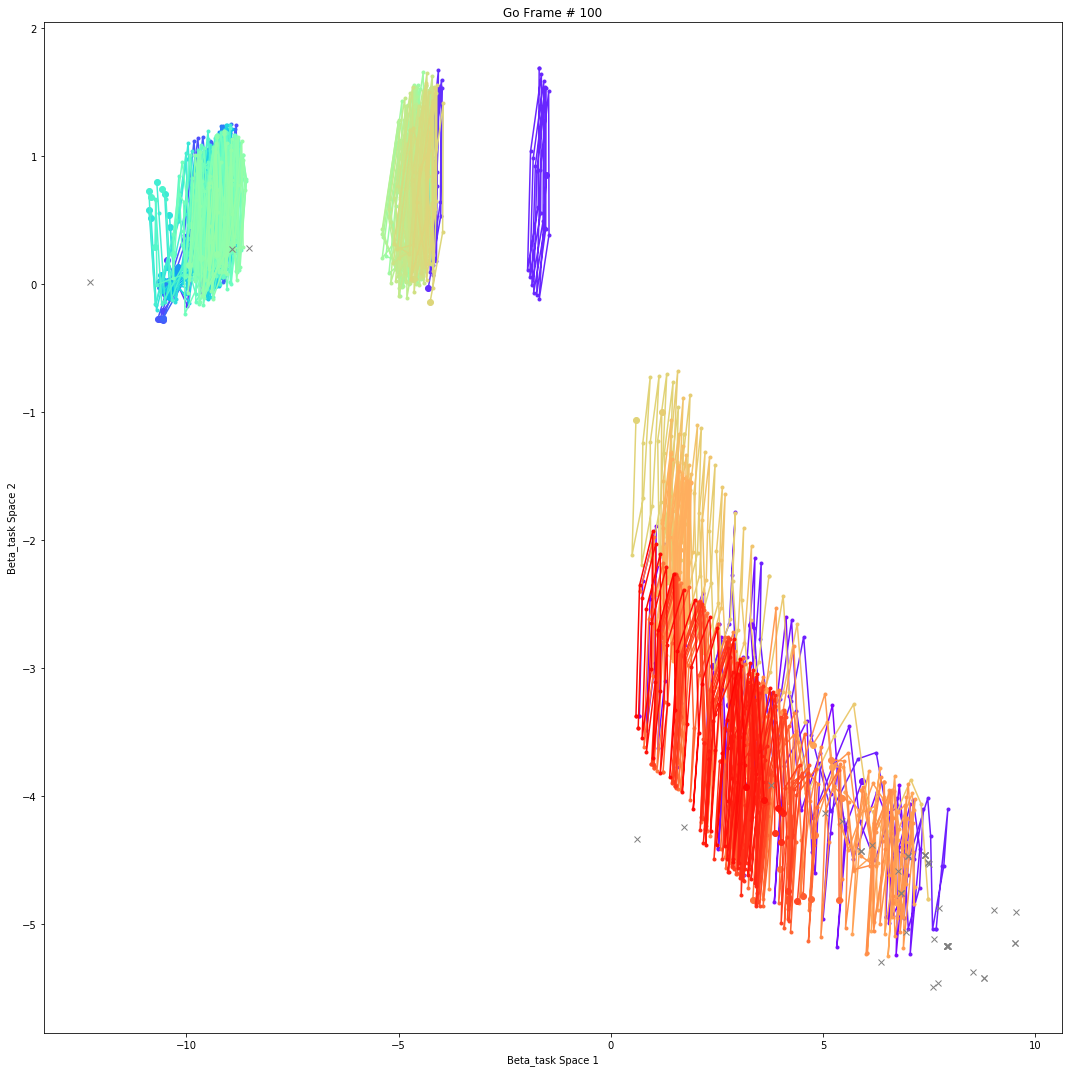

In [10]:
T_use = fpf_dict[rule_set[0]]['epoch_inds'][0]
X = np.concatenate((fpf_dict[rule_set[0]]['state_traj'][:,T_use,:],
                    fpf_dict[rule_set[1]]['state_traj'][:,T_use,:]),axis = 0).T
y1 = np.concatenate((np.sin(trial[rule].stim_locs),np.sin(trial[rule].stim_locs)),axis = 0)
y2 = np.concatenate((np.zeros(np.shape(trial[rule].stim_locs)),np.ones(np.shape(trial[rule].stim_locs))),axis = 0)

#y2 = np.concatenate((np.cos(trial[rule].stim_locs),np.cos(trial[rule].stim_locs)),axis = 0)
y = np.concatenate((y1,y2),axis=1)

X_zscore = stats.zscore(X, axis=1)
X_zscore_nonan = X_zscore
X_zscore_nonan[np.isnan(X_zscore)] = 0
r = X_zscore_nonan

lm = linear_model.LinearRegression()
model = lm.fit(y,r.T)
Beta = model.coef_
Beta_task,_ = LA.qr(Beta)

plot_in_space(Beta_task.T, plot_trials = 100)
plt.xlabel('Beta_task Space 1')
plt.ylabel('Beta_task Space 2')
plt.title('Go Frame # ' + str(T_use))  
plt.show()

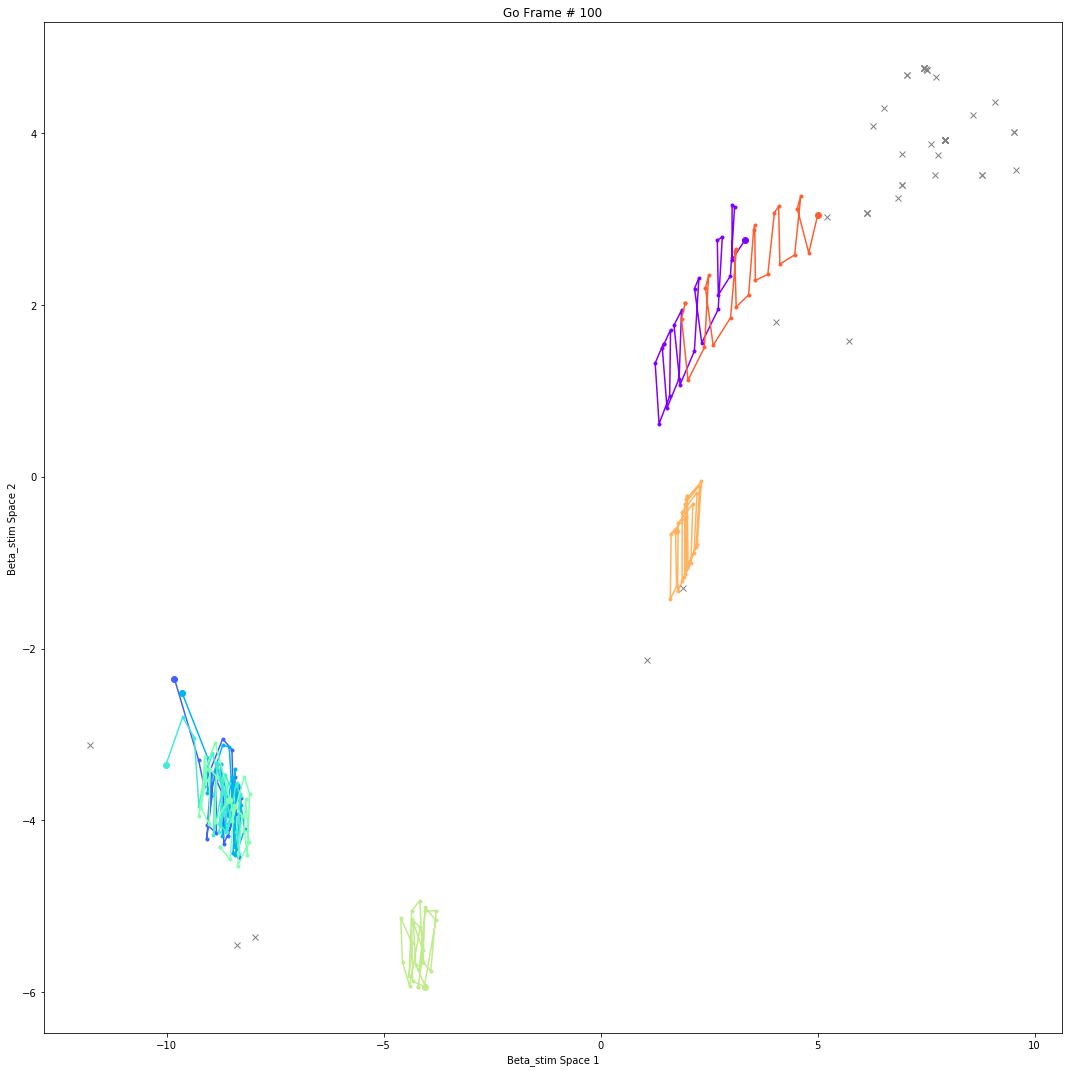

In [11]:
T_use = fpf_dict[rule_set[0]]['epoch_inds'][0]
inds_use = range(0,400,50)
X = np.concatenate((fpf_dict[rule_set[0]]['state_traj'][inds_use,T_use,:],
                    fpf_dict[rule_set[0]]['state_traj'][inds_use,T_use,:]),axis = 0).T
y1 = np.concatenate((np.sin(trial[rule].stim_locs[inds_use]),np.sin(trial[rule].stim_locs[inds_use])),axis = 0)
y2 = np.concatenate((np.cos(trial[rule].stim_locs[inds_use]),np.cos(trial[rule].stim_locs[inds_use])),axis = 0)
y = np.concatenate((y1,y2),axis=1)

X_zscore = stats.zscore(X, axis=1)
X_zscore_nonan = X_zscore
X_zscore_nonan[np.isnan(X_zscore)] = 0
r = X_zscore_nonan

lm = linear_model.LinearRegression()
model = lm.fit(y,r.T)
Beta = model.coef_
Beta_stim,_ = LA.qr(Beta)

plot_in_space(Beta_stim[:,(0,2)].T, skip_trials = 50 ,plot_trials = 100)
plt.xlabel('Beta_stim Space 1')
plt.ylabel('Beta_stim Space 2')
plt.title('Go Frame # ' + str(T_use))  
plt.show()

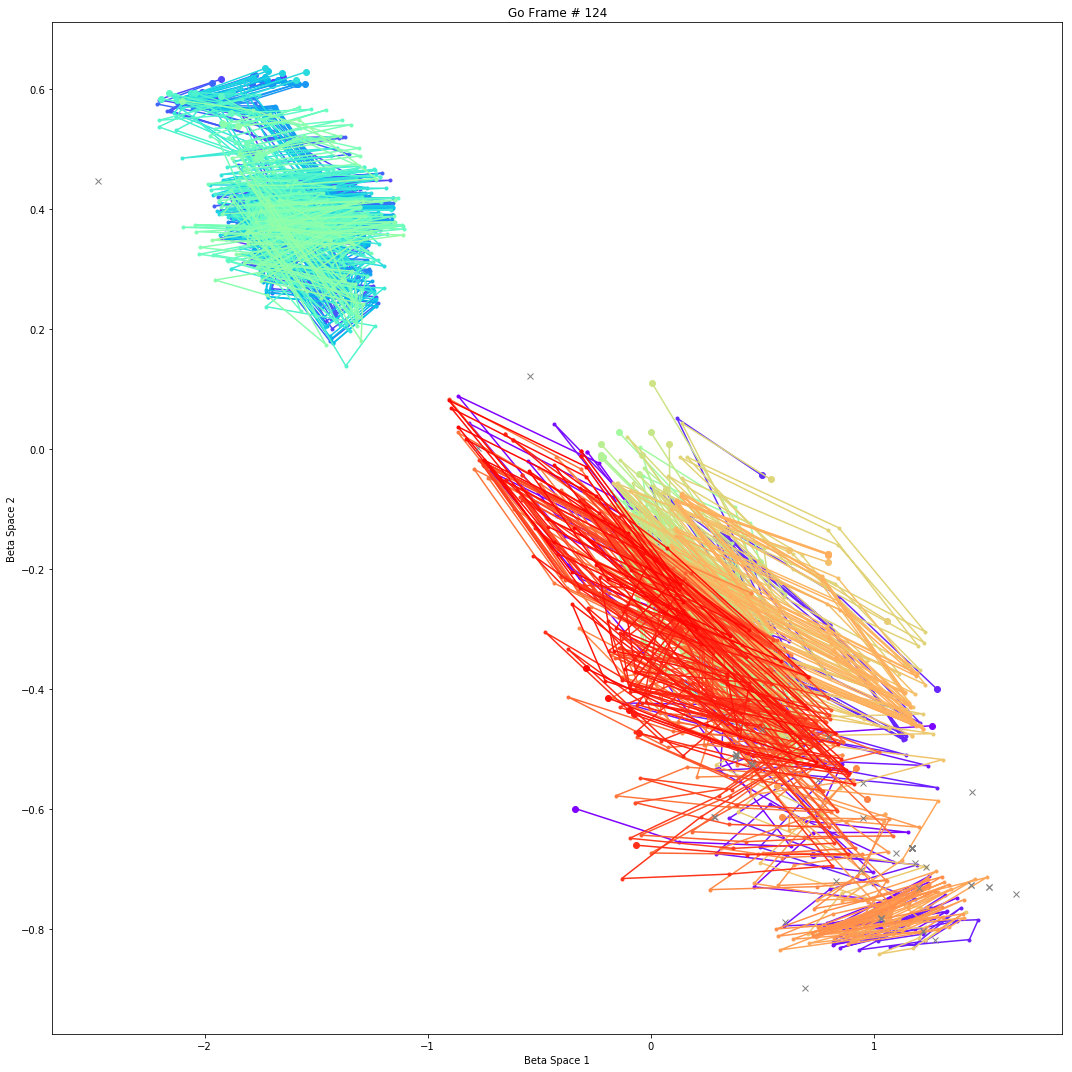

In [12]:
for T_use in range(124,125):
    X = np.concatenate((fpf_dict[rule_set[0]]['state_traj'][:,T_use,:],
                        fpf_dict[rule_set[0]]['state_traj'][:,T_use,:]),axis = 0).T
    y1 = np.concatenate((np.sin(trial[rule].stim_locs),
                        np.sin(trial[rule].stim_locs[range(200,400)]),
                        np.sin(trial[rule].stim_locs[range(200)])),axis = 0)
    y2 = np.concatenate((np.cos(trial[rule].stim_locs),
                        np.cos(trial[rule].stim_locs[range(200,400)]),
                        np.cos(trial[rule].stim_locs[range(200)])),axis = 0)
    y = np.concatenate((y1,y2),axis=1)

    X_zscore = stats.zscore(X, axis=1)
    X_zscore_nonan = X_zscore
    X_zscore_nonan[np.isnan(X_zscore)] = 0
    r = X_zscore_nonan

    lm = linear_model.LinearRegression()
    model = lm.fit(y,r.T)
    Beta = model.coef_
    Beta_mov,_ = LA.qr(Beta)
    
    plot_in_space(Beta_mov[:,(0,2)].T, plot_trials = 100)
    plt.xlabel('Beta Space 1')
    plt.ylabel('Beta Space 2')
    plt.title('Go Frame # ' + str(T_use))
    plt.show()

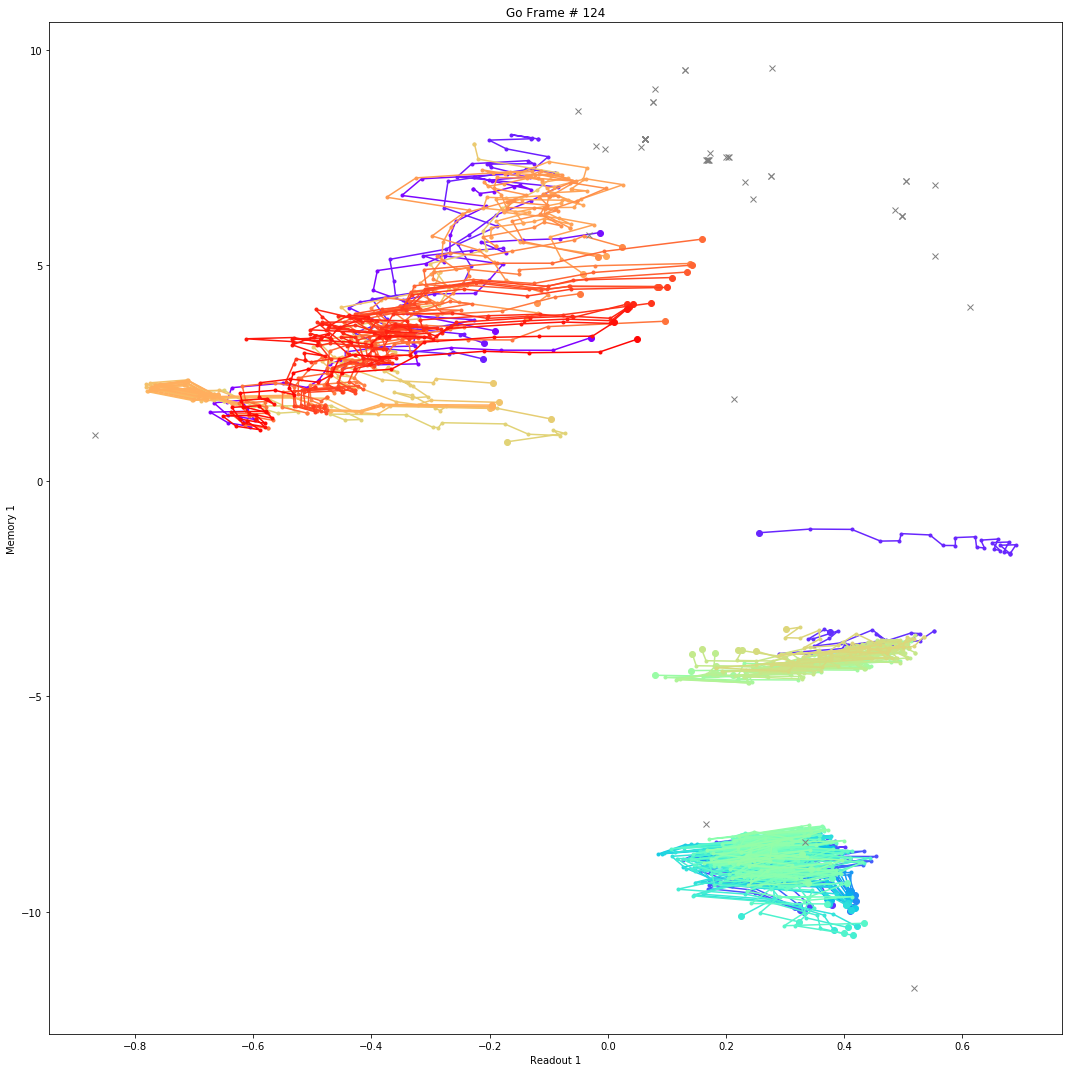

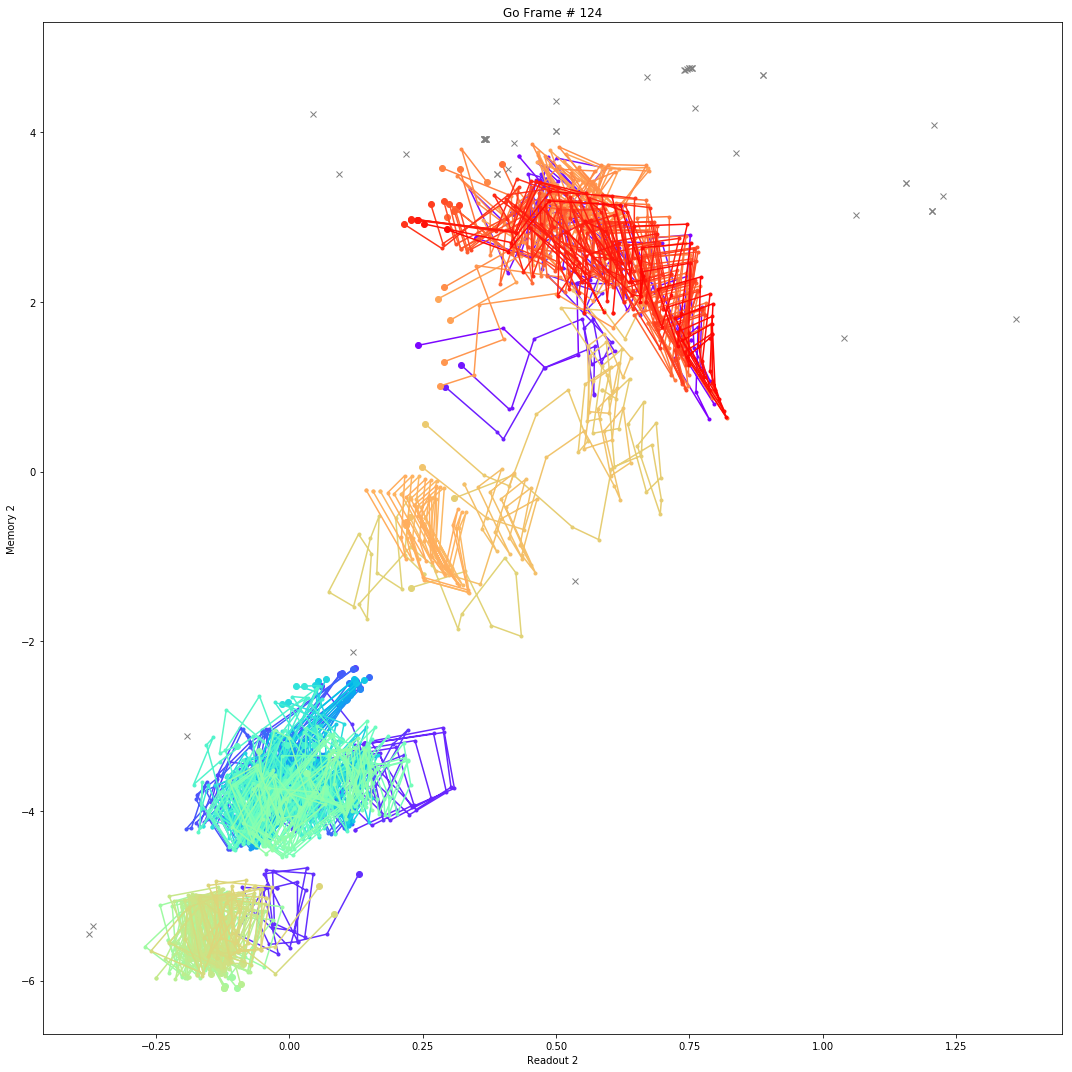

In [13]:
    D = np.concatenate((np.expand_dims(w_out[:,1],axis=1),np.expand_dims(Beta_stim[:,0],axis=1)),axis = 1)
    plot_in_space(D.T, plot_trials = 100)
    plt.xlabel('Readout 1')
    plt.ylabel('Memory 1')
    plt.title('Go Frame # ' + str(T_use))
    plt.show()
    
    D = np.concatenate((np.expand_dims(w_out[:,2],axis=1),np.expand_dims(Beta_stim[:,2],axis=1)),axis = 1)
    plot_in_space(D.T, plot_trials = 100)
    plt.xlabel('Readout 2')
    plt.ylabel('Memory 2')
    plt.title('Go Frame # ' + str(T_use))
    plt.show()

In [14]:
fp_list = fpf_dict['delayanti']['xstar']
max_anti = np.max(fp_list,axis=0)
v_anti = np.mean(fp_list - max_anti, axis = 0)

fp_list = fpf_dict['delaygo']['xstar']
max_anti = np.max(fp_list,axis=0)
v_go = np.mean(fp_list - max_anti, axis = 0)

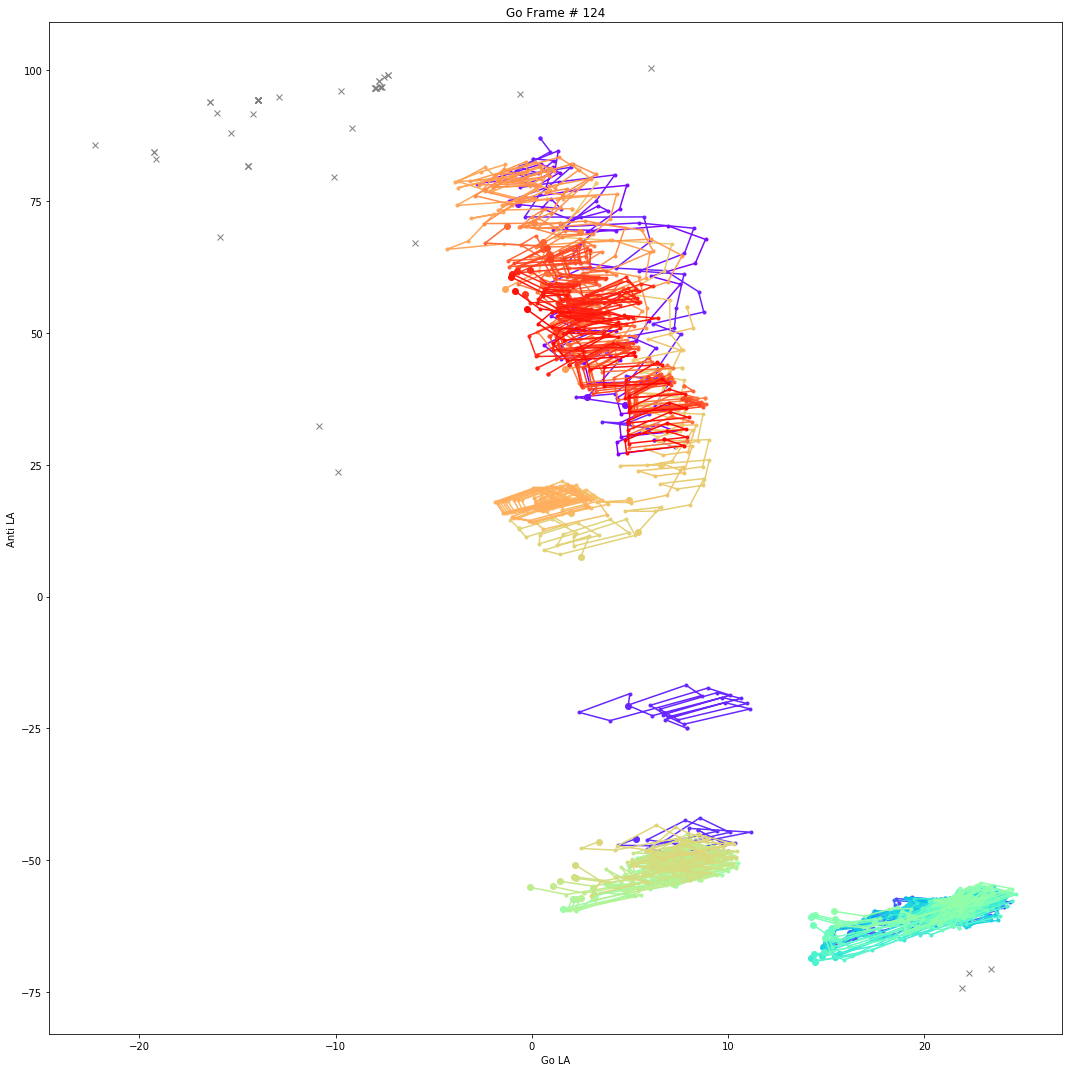

In [15]:
D = np.concatenate((np.expand_dims(v_anti,axis=1),np.expand_dims(v_go,axis=1)),axis = 1)
plot_in_space(D.T, plot_trials = 100)
plt.xlabel('Go LA')
plt.ylabel('Anti LA')
plt.title('Go Frame # ' + str(T_use))
plt.show()

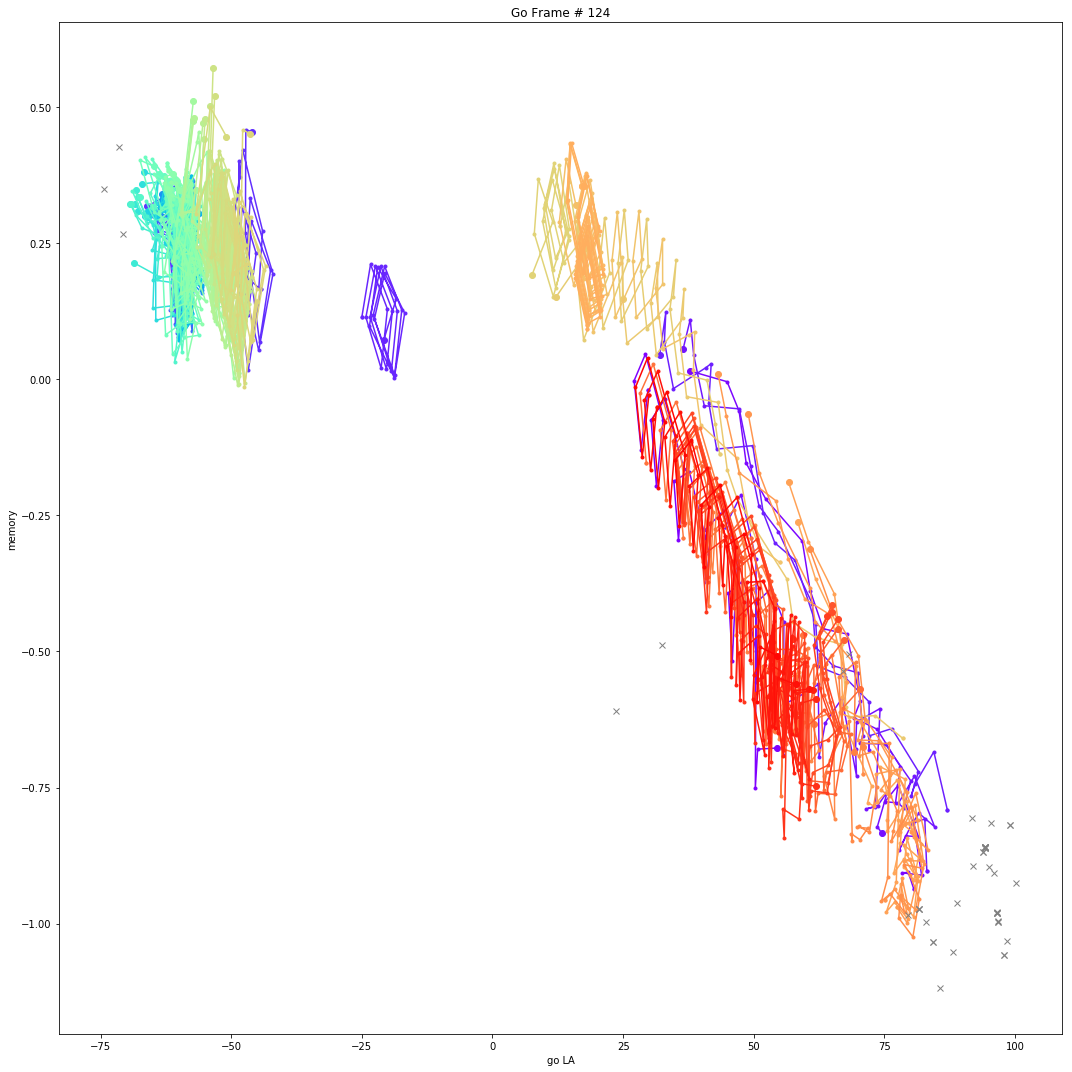

In [16]:
D = np.concatenate((np.expand_dims(v_go,axis=1),np.expand_dims(Beta_stim[:,1],axis=1)),axis = 1)
plot_in_space(D.T, plot_trials = 100)
plt.xlabel('go LA')
plt.ylabel('memory')
plt.title('Go Frame # ' + str(T_use))
plt.show()

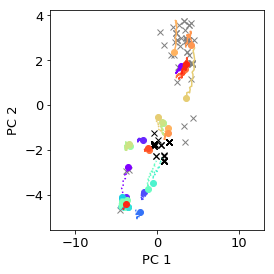

In [17]:
def plot_sitch(pc_ind0,pc_ind1):
    
    cmap=plt.get_cmap('rainbow')
    qmap=plt.get_cmap('gray')
    skip_trials = 2
    plot_trials = 100
    rule = 'delaygo'
    T,S,_ = np.shape(trial[rule].x)
    shift_ind = int(S/skip_trials)
    
    X = np.concatenate((fpf_dict[rule_set[0]]['state_traj'][0:S:skip_trials,:,:],
                        fpf_dict[rule_set[1]]['state_traj'][0:S:skip_trials,:,:]),axis = 0)
    
    e_start = fpf_dict[rule_set[0]]['epoch_inds'][0]
    e_end = fpf_dict[rule_set[0]]['epoch_inds'][-1]
    
    fig = plt.figure(figsize=(4, 4),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 13})

    for xi in range(len(fpf_dict[rule]['xstar'])):
        c_go = [.5, .5, .5,]
        c_anti = 'k'
        xstar_pca = pca.transform(np.expand_dims(fpf_dict['delaygo']['xstar'][xi],axis = 1).T)
        plt.plot(xstar_pca[:,pc_ind0],xstar_pca[:,pc_ind1],'x',c = c_go)

        xstar_pca = pca.transform(np.expand_dims(fpf_dict['delayanti']['xstar'][xi],axis = 1).T)
        plt.plot(xstar_pca[:,pc_ind0],xstar_pca[:,pc_ind1],'x',c = c_anti)

    for t in range(0,shift_ind,int(np.ceil(shift_ind/20))):
        c = cmap(t/shift_ind)
        X_trial = pca.transform(X[t,:,:])
        plt.plot(X_trial[e_start,pc_ind0],X_trial[e_start,pc_ind1],'o',c = c)
        plt.plot(X_trial[e_start:e_end,pc_ind0],X_trial[e_start:e_end,pc_ind1],'-',c = c)

        X_trial = pca.transform(X[shift_ind+t,:,:])
        plt.plot(X_trial[e_start,pc_ind0],X_trial[e_start,pc_ind1],'o',c = c)
        plt.plot(X_trial[e_start:e_end,pc_ind0],X_trial[e_start:e_end,pc_ind1],':',c = c)
        
#     plt.axis('square')
    plt.xlabel('PC '+str(pc_ind0+1))
    plt.ylabel('PC '+str(pc_ind1+1))
    
fldr = os.path.join('ncm/load_fps_pc_figs/',dir_specific_all,str(model_n))
if not os.path.exists(fldr):
    os.makedirs(fldr)

pc_ind0 = 0
pc_ind1 = 1
plot_sitch(pc_ind0,pc_ind1)
plt.xlim((-13,13))
plt.savefig(fldr + '/fp_pc_plots_pcs' + str(pc_ind0)+'_'+str(pc_ind1)+'_'+
    filename + '_model_' + str(model_n) + '.svg')
plt.show() 

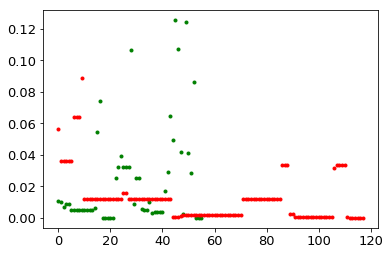

In [18]:
anti_fps = fpf_dict['delayanti']['qstar']<.012
go_fps = fpf_dict['delaygo']['qstar']<.012

plt.plot(np.sqrt(fpf_dict['delaygo']['qstar']),'.g')
plt.plot(np.sqrt(fpf_dict['delayanti']['qstar']),'.r')
plt.show()

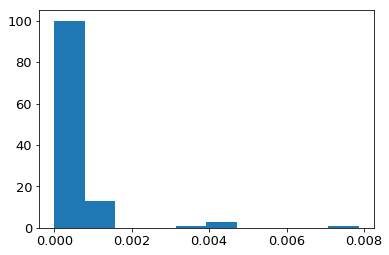

In [19]:
plt.hist(fpf_dict['delayanti']['qstar'][anti_fps])
plt.show()

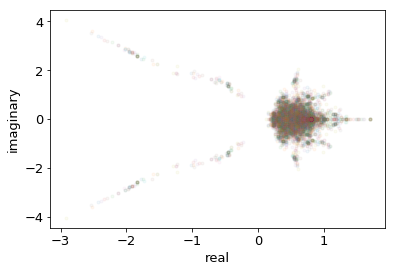

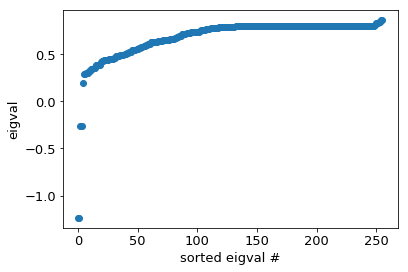

In [20]:
task = 'delaygo'
n_fps = len(fpf_dict[task]['qstar'])
n_ints = np.zeros(n_fps)

for fp_n in range(n_fps):
    
    w, v = LA.eig(fpf_dict[task]['J_xstar'][fp_n])
    plt.plot(w.real,w.imag,'.',alpha = .05)
    
plt.xlabel('real')
plt.ylabel('imaginary')
plt.show()

plt.plot(np.sort(w.real),'o')
plt.xlabel('sorted eigval #')
plt.ylabel('eigval')
plt.show()

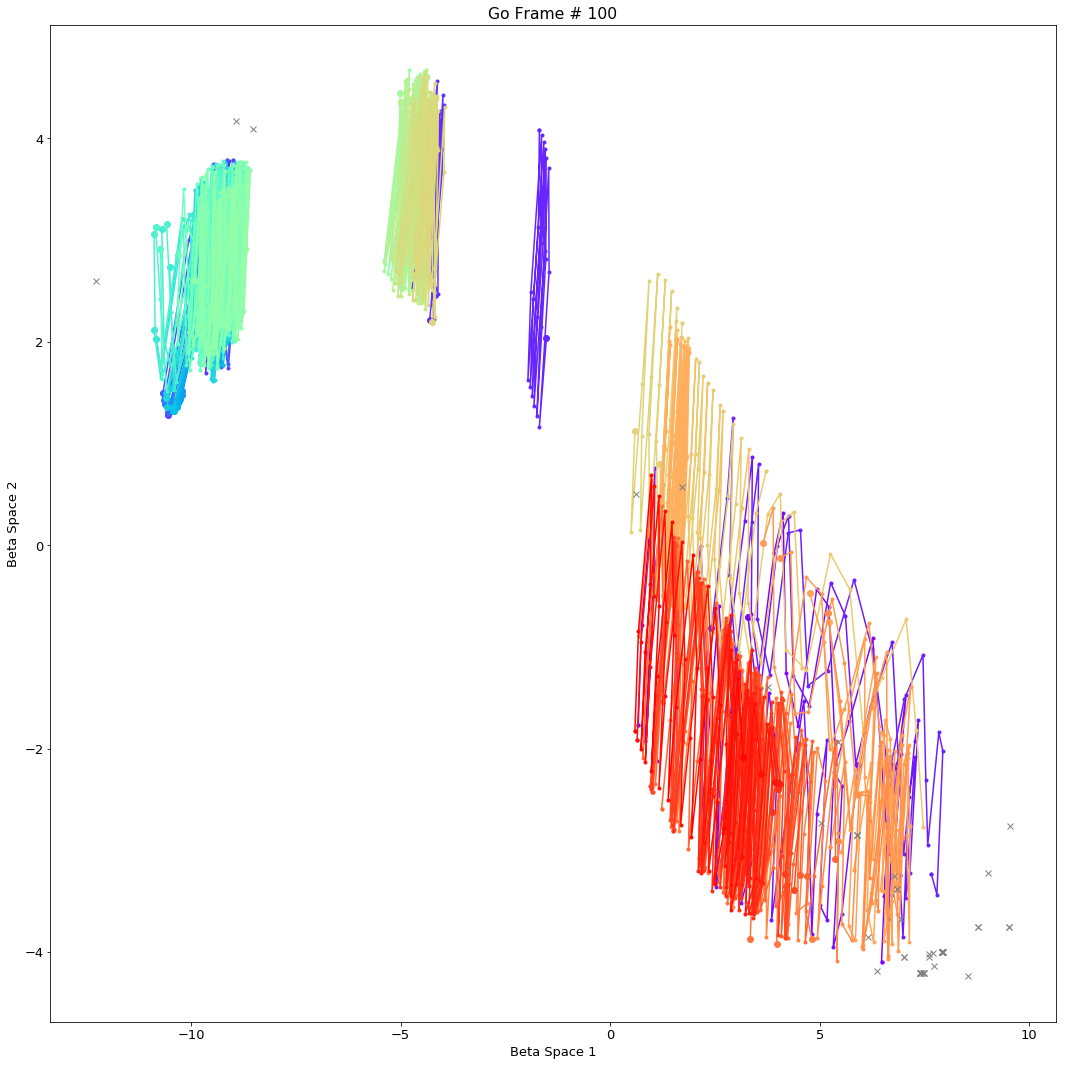

In [21]:
T_use = fpf_dict[rule_set[0]]['epoch_inds'][0]
X = np.concatenate((fpf_dict[rule_set[0]]['state_traj'][:,T_use,:],
                    fpf_dict[rule_set[1]]['state_traj'][:,T_use,:]),axis = 0).T
y1 = np.concatenate((np.sin(trial[rule].stim_locs),np.sin(trial[rule].stim_locs)),axis = 0)
y2 = np.concatenate((np.cos(trial[rule].stim_locs),np.cos(trial[rule].stim_locs)),axis = 0)
y = np.concatenate((y1,y2),axis=1)

X_zscore = stats.zscore(X, axis=1)
X_zscore_nonan = X_zscore
X_zscore_nonan[np.isnan(X_zscore)] = 0
r = X_zscore_nonan

lm = linear_model.LinearRegression()
model = lm.fit(y,r.T)
Beta = model.coef_
Beta_stim,_ = LA.qr(Beta)

plot_in_space(Beta_stim[:,(0,1)].T, plot_trials = 100)
plt.xlabel('Beta Space 1')
plt.ylabel('Beta Space 2')
plt.title('Go Frame # ' + str(T_use))  
plt.show()

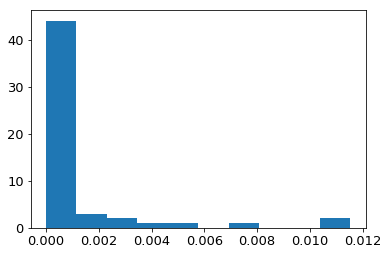

In [22]:
plt.hist(fpf_dict['delaygo']['qstar'][go_fps])
plt.show()

In [23]:
print(len(fpf_dict['delaygo']['qstar']))

56


/Users/lauradriscoll/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


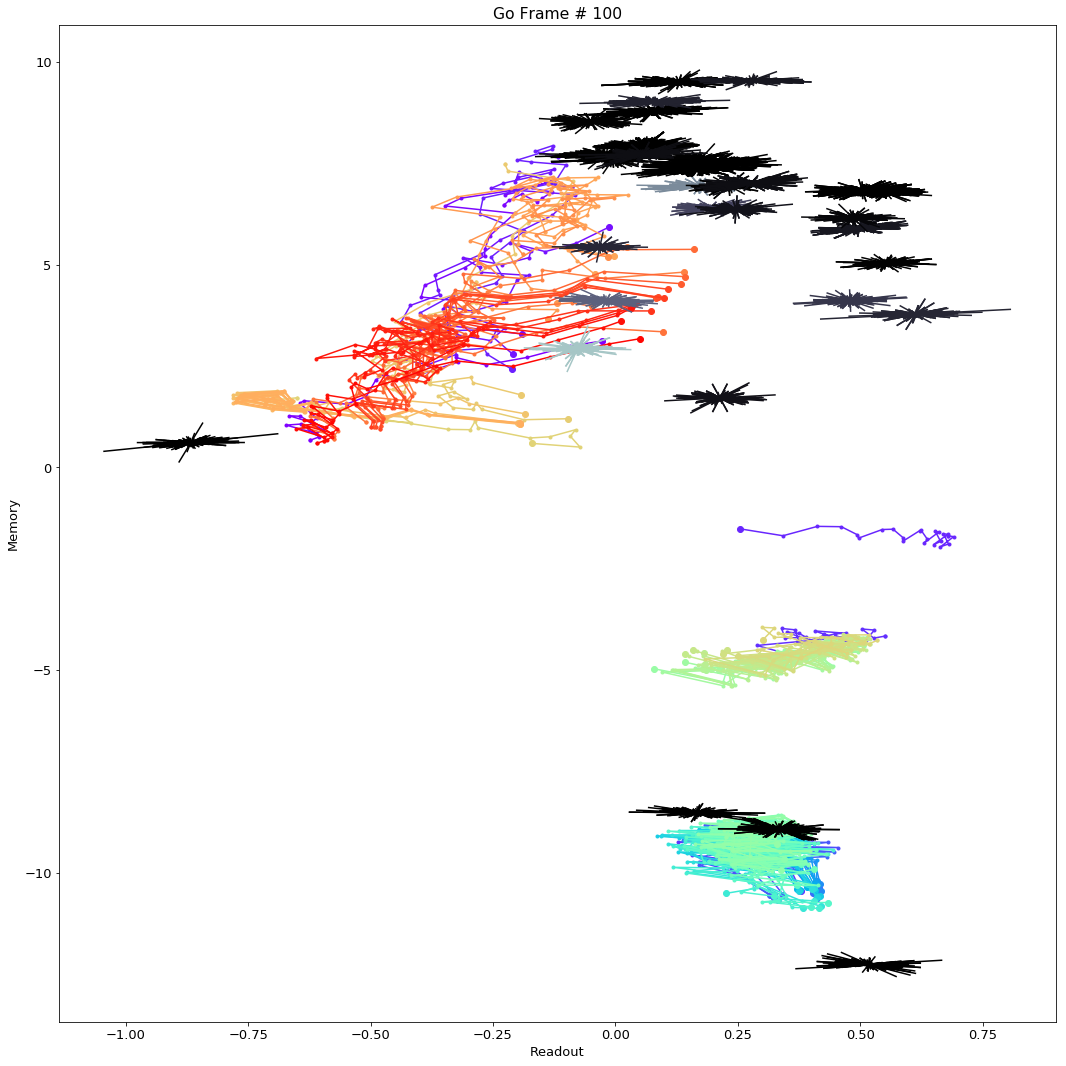

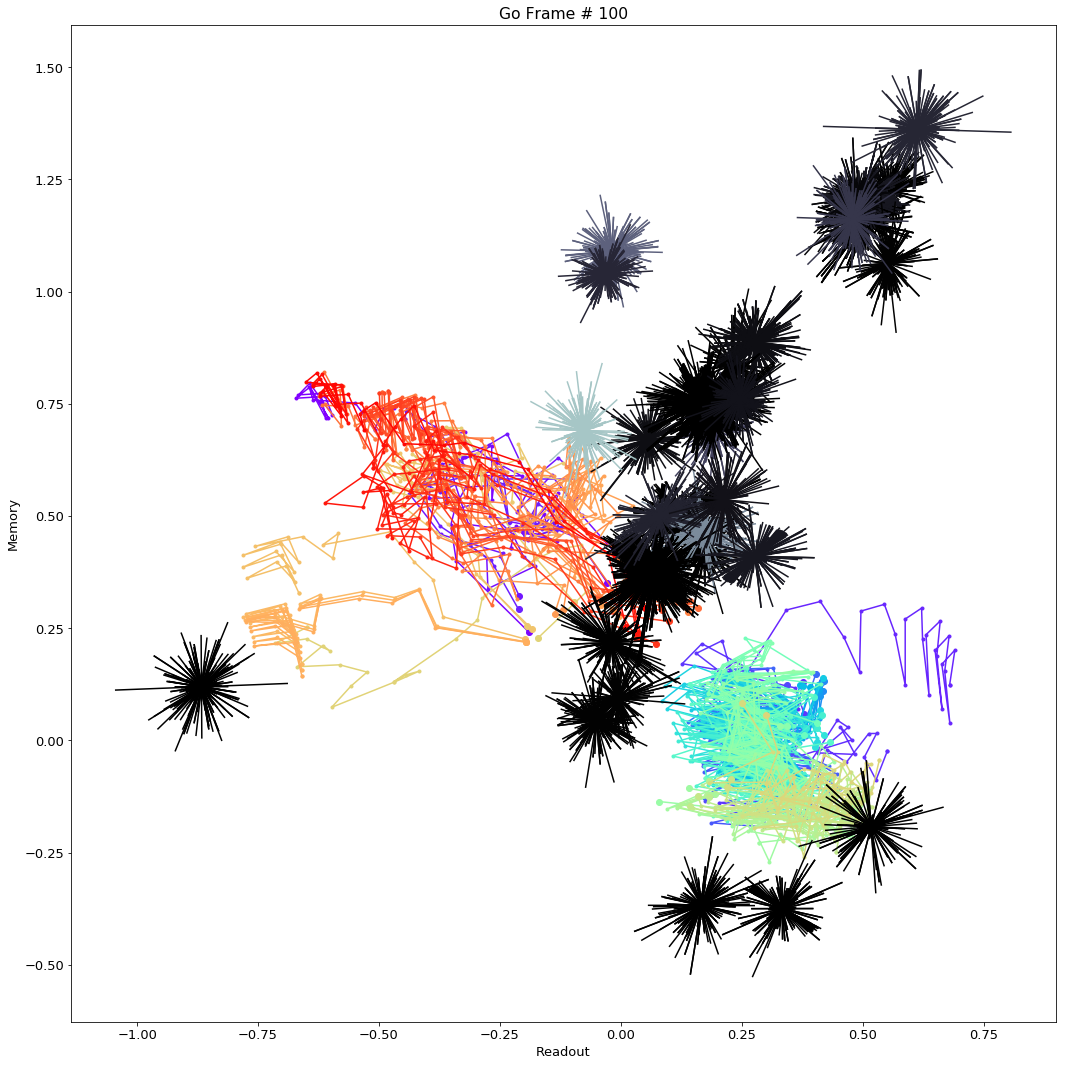

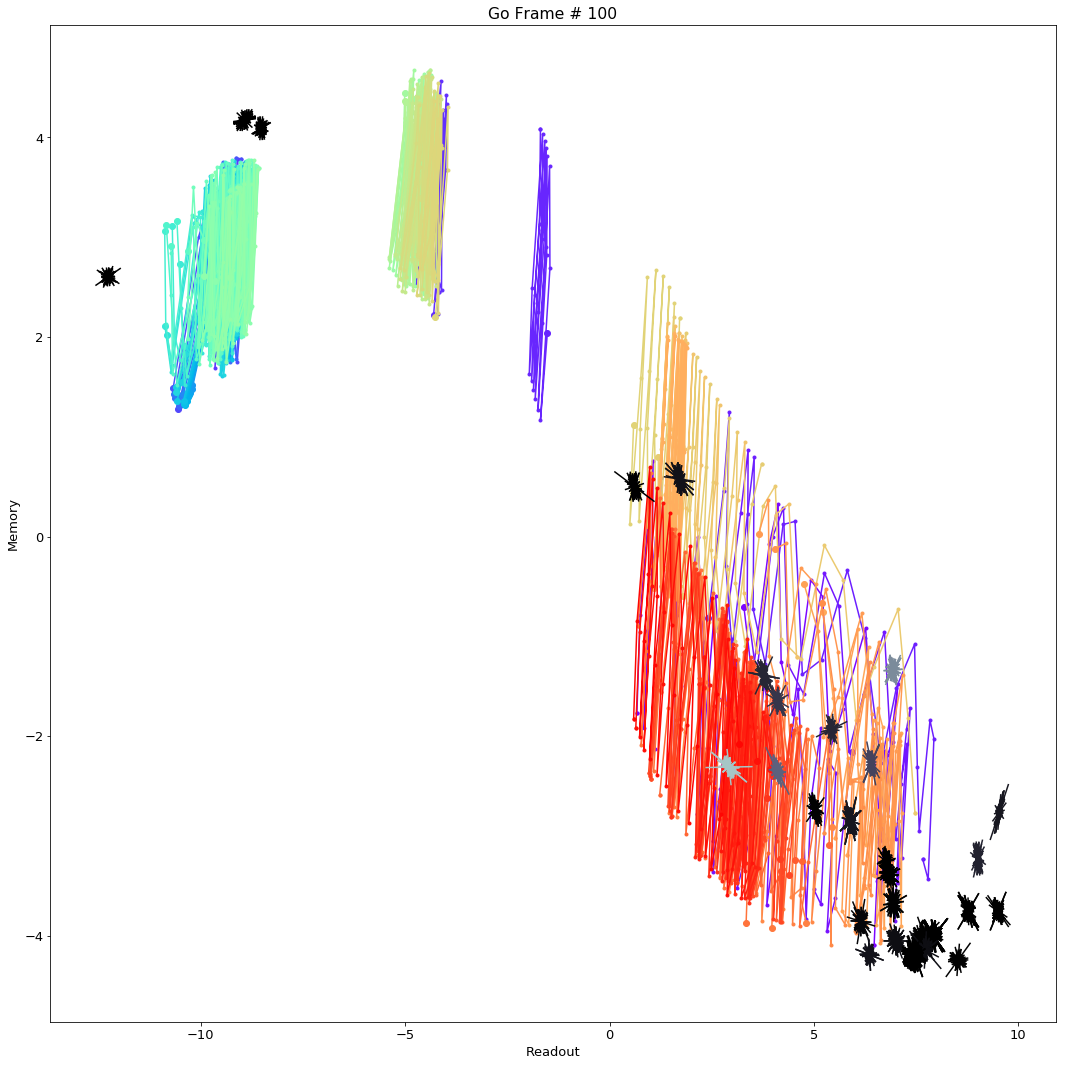

In [24]:
# anti_fps = fpf_dict['delayanti']['qstar']<.002
go_fps = fpf_dict['delaygo']['qstar']<.01
cmap = plt.get_cmap('bone')
lim = .01

def mem2readout(D,task):
    n_fps = len(fpf_dict[task]['qstar'])
    n_ints = np.zeros(n_fps)
    plot_in_space(D, plot_trials = 100)

    for fp_n in range(0,n_fps):
        if fpf_dict[task]['qstar'][fp_n]<lim:
            c = cmap(fpf_dict[task]['qstar'][fp_n]/lim)
            w, v = LA.eig(fpf_dict[task]['J_xstar'][fp_n])
            fp = np.dot(D,fpf_dict[task]['xstar'][fp_n])
            plt.plot(fp[0],fp[1],'o',c=c)
            n_ints[fp_n] = np.sum(w.real>np.median(w.real))
            if n_ints[fp_n]>0:
                v_stim = np.dot(D,v[:,w.real>np.median(w.real)])
                for unstable_d in range(np.shape(v_stim)[1]):
                    plt.plot((fp[0]-v_stim[0,unstable_d],fp[0]+v_stim[0,unstable_d]),
                             (fp[1]-v_stim[1,unstable_d],fp[1]+v_stim[1,unstable_d]),'-',c=c)
    plt.xlabel('Readout')
    plt.ylabel('Memory')
    plt.title('Go Frame # ' + str(T_use))  
    plt.show()
    
# mem2readout('delayanti')
D = np.concatenate((np.expand_dims(w_out[:,1],axis=1),np.expand_dims(Beta_stim[:,0],axis=1)),axis = 1).T
mem2readout(D,'delaygo')
mem2readout(w_out[:,1:].T,'delaygo')
mem2readout(Beta_stim.T,'delaygo')

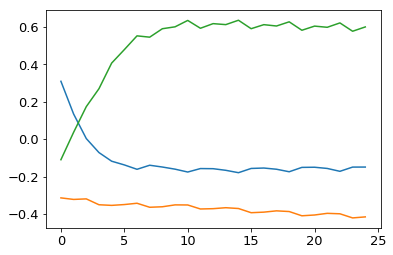

AttributeError: 'dict' object has no attribute 'y'

In [25]:
t = 0
plt.plot(np.dot(x_delaygo[:,t,:].T,w_out)+b_out)
plt.show()

plt.plot(trial.y[:,t,:],':',lineWidth = 3)
plt.show()